In [70]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline
import importlib
import numpy as np
import data_handling

In [109]:
importlib.reload(data_handling)
from data_handling import Saver, Logger

l = Logger()

Blank init for Logger object.


Blank init for Logger object.


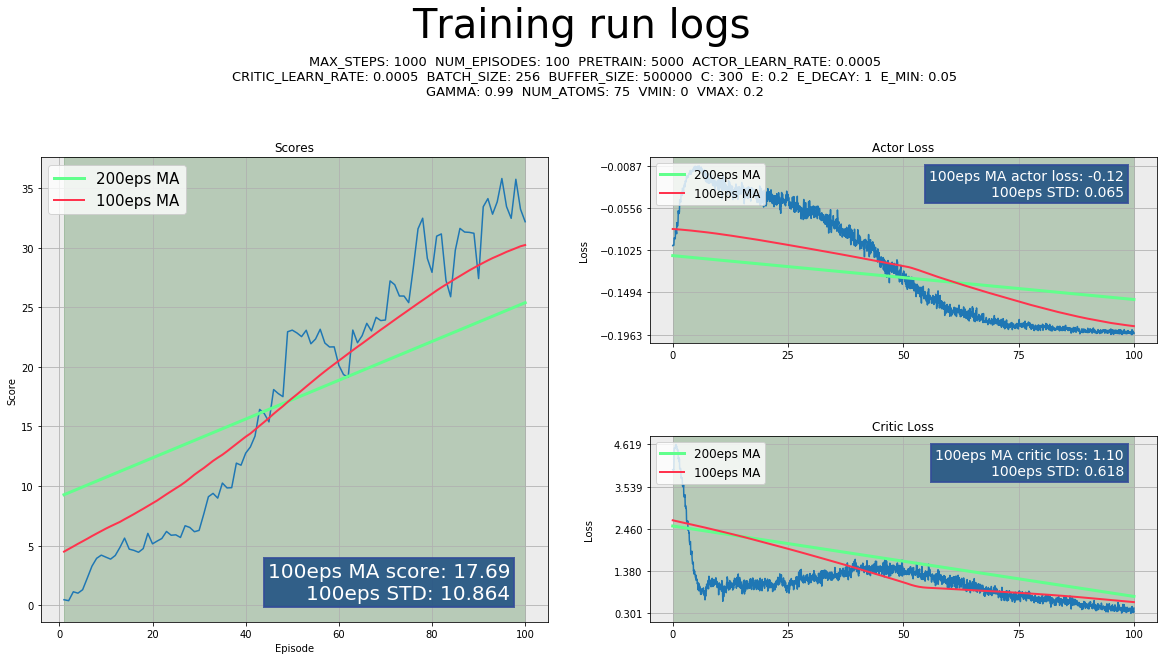

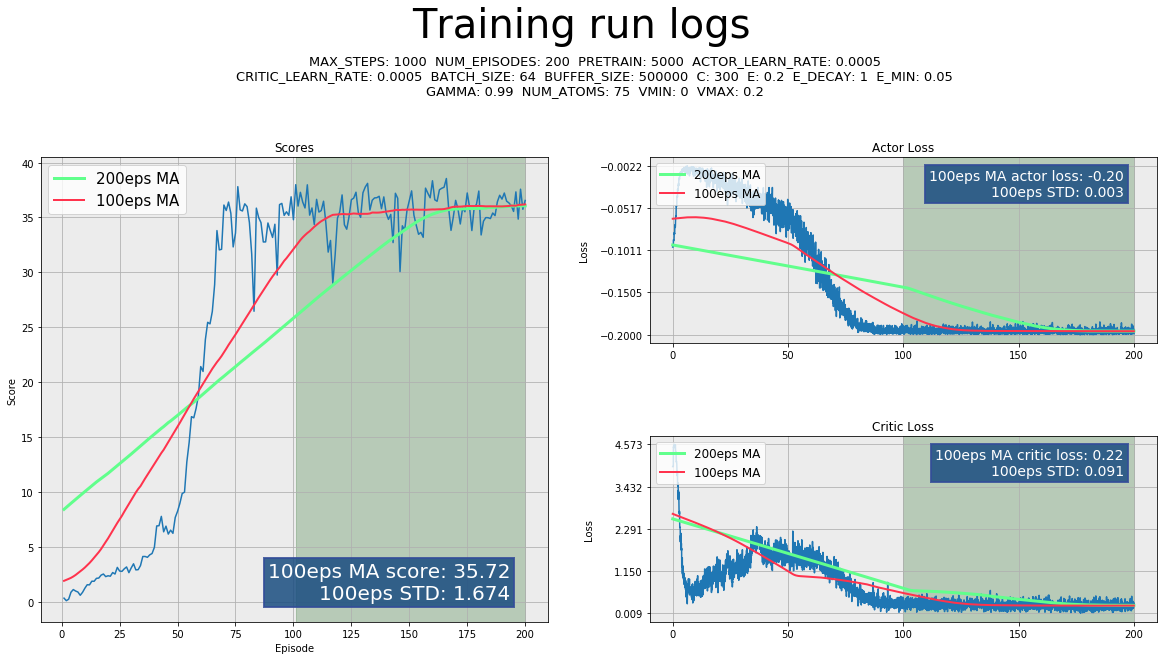

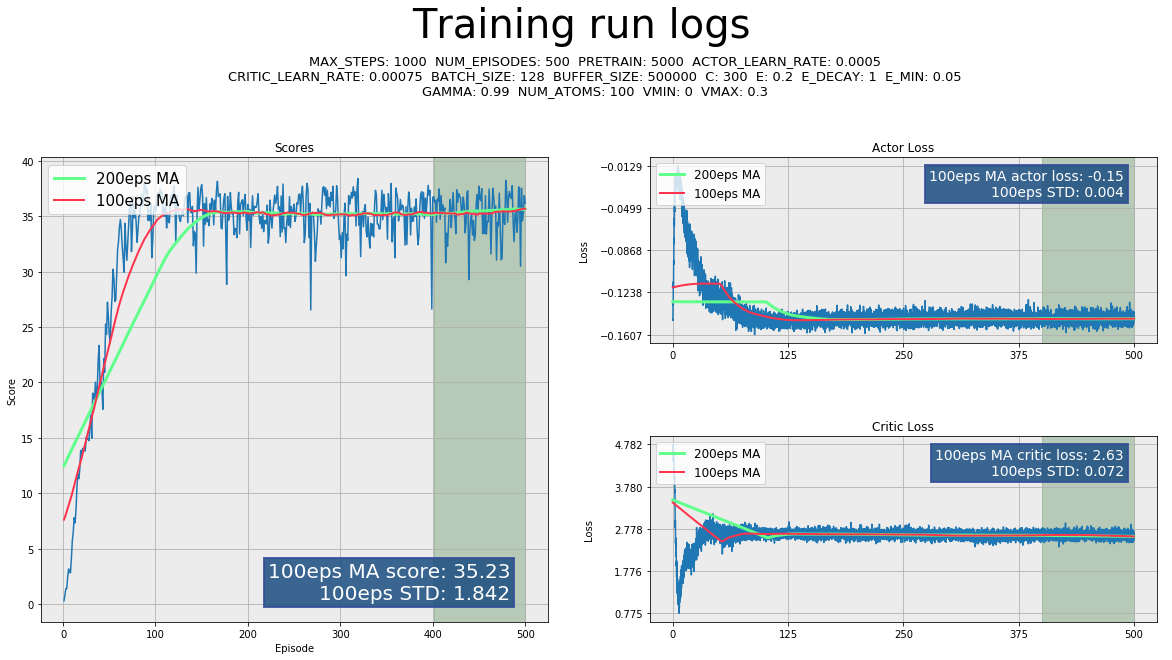

In [133]:
importlib.reload(data_handling)
from data_handling import Saver, Logger
l = Logger()


f ="C:\\Users\\mattdoll\\Development\\deep-reinforcement-learning\\p2_continuous-control\\saves\\D4PG_20190310_v7\\logs"
l.graph(f, False)
f ="C:\\Users\\mattdoll\\Development\\deep-reinforcement-learning\\p2_continuous-control\\saves\\D4PG_20190310_v8\\logs"
l.graph(f, False)
f ="C:\\Users\\mattdoll\\Development\\deep-reinforcement-learning\\p2_continuous-control\\saves\\D4PG_20190310_v9\\logs"
l.graph(f, False)

In [ ]:
scores_fp = "C:\\Users\\mattdoll\\Development\\deep-reinforcement-learning\\p2_continuous-control\\saves\\D4PG_20190309_v10\\logs\\D4PG_20190309_v10_scores.txt"
actor_fp = "C:\\Users\\mattdoll\\Development\\deep-reinforcement-learning\\p2_continuous-control\\saves\\D4PG_20190309_v10\\logs\\D4PG_20190309_v10_actorloss.txt"
critic_fp = "C:\\Users\\mattdoll\\Development\\deep-reinforcement-learning\\p2_continuous-control\\saves\\D4PG_20190309_v10\\logs\\D4PG_20190309_v10_criticloss.txt"

In [ ]:
with open(scores_fp, 'r') as f:
    slines = [float(i) for i in f.read().splitlines()]
with open(actor_fp, 'r') as f:
    alines = [float(i) for i in f.read().splitlines()]
with open(critic_fp, 'r') as f:
    clines = [float(i) for i in f.read().splitlines()]    

In [ ]:
log_fp = "C:\\Users\\mattdoll\\Development\\deep-reinforcement-learning\\p2_continuous-control\\saves\\D4PG_20190309_v10\\logs\\D4PG_20190309_v10_LOG.txt"

In [ ]:
with open(log_fp, 'r') as f:
    loglines = f.read().splitlines()

In [ ]:
loglines

In [ ]:
pstring = ''
counter = 0
params = ['num_episodes', 'c', 'num_atoms', 'vmin', 'vmax', 'e', 'e_decay', 'e_min', 'gamma', 'actor_learn_rate', 'critic_learn_rate', 'buffer_size', 'batch_size', 'pretrain']
for line in loglines:
    if line.split(':')[0].lower() in params:
        line += '  '
        counter += len(line)
        
        if counter > 80:
            pstring += '\n'
            counter = 0
        pstring += line

In [ ]:
pstring

In [ ]:
logdict = {}
for line in loglines:
    try:
        key, value = line.split(':')
        logdict[key.lower()] = value.strip()
    except:
        pass

In [ ]:
pstring = ''
pstring += "{} :"

In [ ]:
score_x = np.linspace(1, len(slines), len(slines))
actor_x = np.linspace(1, len(alines), len(alines))
critic_x = np.linspace(1, len(clines), len(clines))
xcount = 5
xstep = int(len(slines)/xcount)
xticks = np.linspace(0, len(slines), xcount, dtype=int)
dtop = 0.85

In [ ]:
fig = plt.figure(figsize=(20,10))
gs = GridSpec(2, 2, hspace=.5, wspace=.2, top=dtop-0.08)#,  right=1.5)
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,1])
gs2 = GridSpec(1,1, bottom=dtop-0.01, top=dtop)
dummyax = fig.add_subplot(gs2[0,0])
ax1.plot(score_x, slines)
ax1.set_title("Scores")
ax1.set_xlabel("Episode")
ax1.set_ylabel("Score")

ax2.plot(actor_x, alines)
ax2.set_title("Actor Loss")
ax2.set_xticks(np.linspace(0, len(alines), xcount))
ax2.set_xticklabels(xticks)
ax2.set_yticks(np.linspace(min(alines), max(alines), 5))
ax2.set_ylabel("Loss", labelpad=10)


ax3.plot(critic_x, clines)
ax3.set_title("Critic Loss")
ax3.set_xticks(np.linspace(0, len(alines), xcount))
ax3.set_xticklabels(xticks)
ax3.set_yticks(np.linspace(min(clines), max(clines), 5))
ax3.set_ylabel("Loss", labelpad=20)

dummyax.set_title(pstring, size=13)
dummyax.axis("off")

fig.suptitle("D4PG Training Run", size=40)

fig.show()
fig.savefig("graph.png")

## 